In [64]:
import pandas as pd
import seaborn as sns

In [44]:
def filter_df(df):
    df = df[df['is_prompt'] == 1]
    return df

In [96]:
bi_df = filter_df(pd.read_csv('bilingual.csv'))
bi_df['group'] = 'bilingual'
mono_df = filter_df(pd.read_csv('monolingual.csv'))
mono_df['group'] = 'monolingual'
ad_df = filter_df(pd.read_csv('adult.csv'))
ad_df['group'] = 'adult'
all_df = pd.concat([bi_df, mono_df, ad_df])

group_names = ['bilingual', 'monolingual', 'adult']

## Средняя длина ЭДЕ (в токенах)

## Со знаками препинания

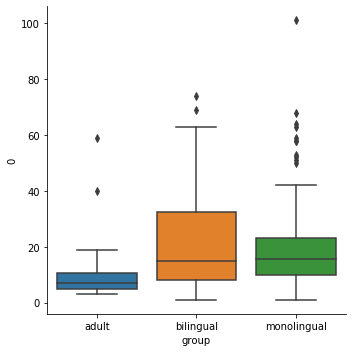

In [85]:
edu_sizes = pd.DataFrame(all_df.groupby(['group', 'segment_id']).size())
edu_sizes = edu_sizes.reset_index()

sns.catplot(x='group', y=0, data=edu_sizes, kind='box');

In [49]:
for df in groups:
    print('Группа: ', df['file'].iloc[0])
    print(df.groupby('segment_id').size().mean())

Группа:  edu_df/bilingual/Ger_f_5_E.csv
20.435714285714287
Группа:  edu_df/monolingual/10mon.csv
20.125
Группа:  edu_df/adult/ad_mon3.csv
8.7


## Без знаков препинания

In [89]:
all_df_no_punct = all_df[all_df['upos'].apply(lambda x: x not in ['PUNCT', 'X'])]

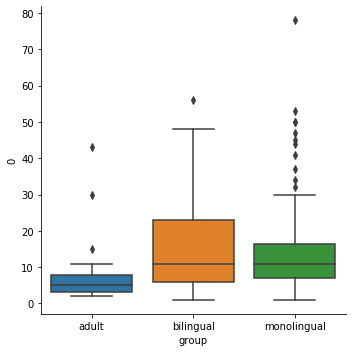

In [90]:
edu_sizes = pd.DataFrame(all_df_no_punct.groupby(['group', 'segment_id']).size())
edu_sizes = edu_sizes.reset_index()

sns.catplot(x='group', y=0, data=edu_sizes, kind='box');

In [58]:
for df in groups:
    print('Группа: ', df['file'].iloc[0])
    df = df[df['upos'].apply(lambda x: x not in ['PUNCT', 'X'])]
    print(df.groupby('segment_id').size().mean())

Группа:  edu_df/bilingual/Ger_f_5_E.csv
14.628571428571428
Группа:  edu_df/monolingual/10mon.csv
14.791666666666666
Группа:  edu_df/adult/ad_mon3.csv
6.3428571428571425


## Среднее количество ЭДЕ на текст

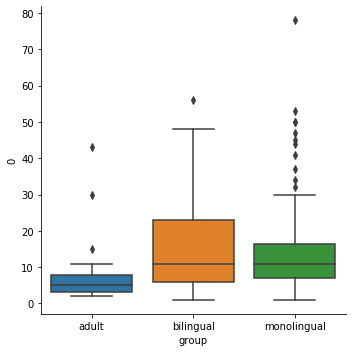

In [93]:
edu_counts = pd.DataFrame(all_df.groupby(['group', 'file']).size())
edu_counts = edu_sizes.reset_index()

sns.catplot(x='group', y=0, data=edu_counts, kind='box');

In [62]:
for df in groups:
    print('Группа: ', df['file'].iloc[0])
    print(df.groupby('file').size().mean())

Группа:  edu_df/bilingual/Ger_f_5_E.csv
317.8888888888889
Группа:  edu_df/monolingual/10mon.csv
161.0
Группа:  edu_df/adult/ad_mon3.csv
152.25


## Частотность частей речи

In [95]:
all_df['upos'].unique()

array(['ADV', 'PUNCT', 'PRON', 'VERB', 'NOUN', 'DET', 'PART', 'INTJ',
       'CCONJ', 'PROPN', 'ADP', 'ADJ', 'NUM', 'AUX', 'SYM', 'X', 'SCONJ'],
      dtype=object)

In [105]:
for pos in ['ADJ', 'CCONJ', 'SCONJ', 'PART', 'NOUN']:
    print(pos)
    for group in group_names:
        group_df = all_df[all_df['group'] == group]
        print(f'{group}: ',
            len(group_df[group_df['upos'] == pos]) / len(group_df) * 10**6,
              ' ipm')

ADJ
bilingual:  37399.510660608175  ipm
monolingual:  7763.975155279503  ipm
adult:  8210.180623973727  ipm
CCONJ
bilingual:  40195.73575672842  ipm
monolingual:  7763.975155279503  ipm
adult:  19704.433497536946  ipm
SCONJ
bilingual:  7340.090877315624  ipm
monolingual:  5693.581780538302  ipm
adult:  8210.180623973727  ipm
PART
bilingual:  59769.31142957008  ipm
monolingual:  35714.28571428571  ipm
adult:  39408.86699507389  ipm
NOUN
bilingual:  102411.7441454037  ipm
monolingual:  147515.52795031056  ipm
adult:  198686.37110016422  ipm
